In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
sim = pd.read_hdf('/tf/primo/data/simulation/targets/callie_janelle.h5')

In [2]:
meta = pd.read_csv('/tf/primo/data/sequencing/Run_92/index.csv')
df = pd.read_pickle('/tf/primo/data/sequencing/Run_92/decoded.pkl.gz')

In [3]:
data = (
    meta
    .set_index(['encoder','query_id','anneal_stop','qt_ratio','dsDNA_conc','rep'])
    .join(df, on='sequencing_index')
    .drop(columns='sequencing_index')
)

In [4]:
test = (
    data
    .xs(['encoder_2019_03', 0.01, 0], level=['encoder', 'qt_ratio', 'rep'])
    .assign(e39871fd9fd74f55=0)
    .reset_index()
    .drop(columns=['query_id','anneal_stop','dsDNA_conc'])
    .transpose()
    .rename(columns={0:'reads'})
)

In [17]:
simandreads = sim.join(test)

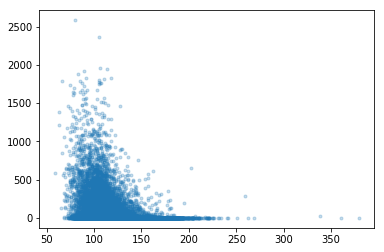

In [25]:
plt.scatter(simandreads['EuclideanDistance'], simandreads['reads'], marker='.', alpha=0.25)

In [5]:
top = test.sort_values('reads', ascending=False)[:100]

In [6]:
top

reads
62961a96bef67a28   2583
9521f7d9ee186698   2365
4e0763156b3cb522   1959
541ee89102f8eb7e   1942
eee168bbfceabe96   1917
74a4446c8a20ca41   1887
b58f08cbbfeeb689   1829
1a0e405948f37c0f   1822
cb4804378f26a581   1813
bb240a5e638b4eb3   1798
7ec7c83bf67152f7   1792
bb0631de05a5e4d7   1789
ecd9608272be7a9f   1774
b9740e95ac30a000   1769
8bee7561a7625218   1769
43d7c6a4772bcaea   1764
9fff7e1a79e7ed22   1749
d58cdbcf43a12e26   1743
5258351006bb56ba   1726
abfa2b3e94e4d610   1699
ed775e7dc25599c9   1675
3dca46257be6b4ed   1672
94ce0ede59f0d50b   1666
e8fa2cded5ae9293   1651
899e59de5ffaae8c   1649
c0ec64b0ef3616c8   1648
c3f9579c01f4bd60   1631
749f727cbe553b52   1618
a4b3d01d2178196d   1612
5ad87cf5c9c52ddd   1573
...                 ...
995042605886f58c   1297
56137e97059ebec2   1297
6b54e325c2fde4df   1294
1c6eee0d9680ffce   1293
9f882dd917875ff7   1288
14093567dec8700e   1286
ea6a0ec22fa57470   1278
d7a0c9eb368d076c   1278
b535cc6460f029f2   1253
e9009d6080bcd04c   1240
a9c9d481a151d9de   1236
fa10682caae158b5   1233
577d3e2ef9a87c7d   1231
a5243fbc83ba3567   1231
cdb6398ff7129ac5   1228
778c79040a3cbc41   1224
7b187f581276a387   1208
c6db79b6aca8c911   1206
f08aa9d5beea4d4f   1192
9321a0ac990731ea   1183
be65a8e72e46461c   1178
647fe233799b992b   1177
58cb2a62fa7d5e35   1174
c6757408f1a328ae   1172
33276ac715a090a8   1169
97b4892d47f92bce   1168
b2ee0b1bbdbf6d76   1161
2b3b7323cf1cf435   1149
d1292112c688c0b9   1148
cdb56bc95d5c08eb   1143

[100 rows x 1 columns]

In [7]:
from PIL import Image

In [8]:
import zipfile

In [9]:
images = {}
for prefix in [hex(i)[2] for i in range(0,16)]:
    print prefix
    img_ids = top.index[[ix.startswith(prefix) for ix in top.index]]
    with zipfile.ZipFile('/tf/open_images/targets/images/train_%s.zip' % prefix) as archive:
        for img_id in img_ids:
            images[img_id] = Image.open(archive.open('train_%s/%s.jpg' % (prefix, img_id)))

0
1
2
3
4
5
6
7
8
9
a
b
c
d
e
f


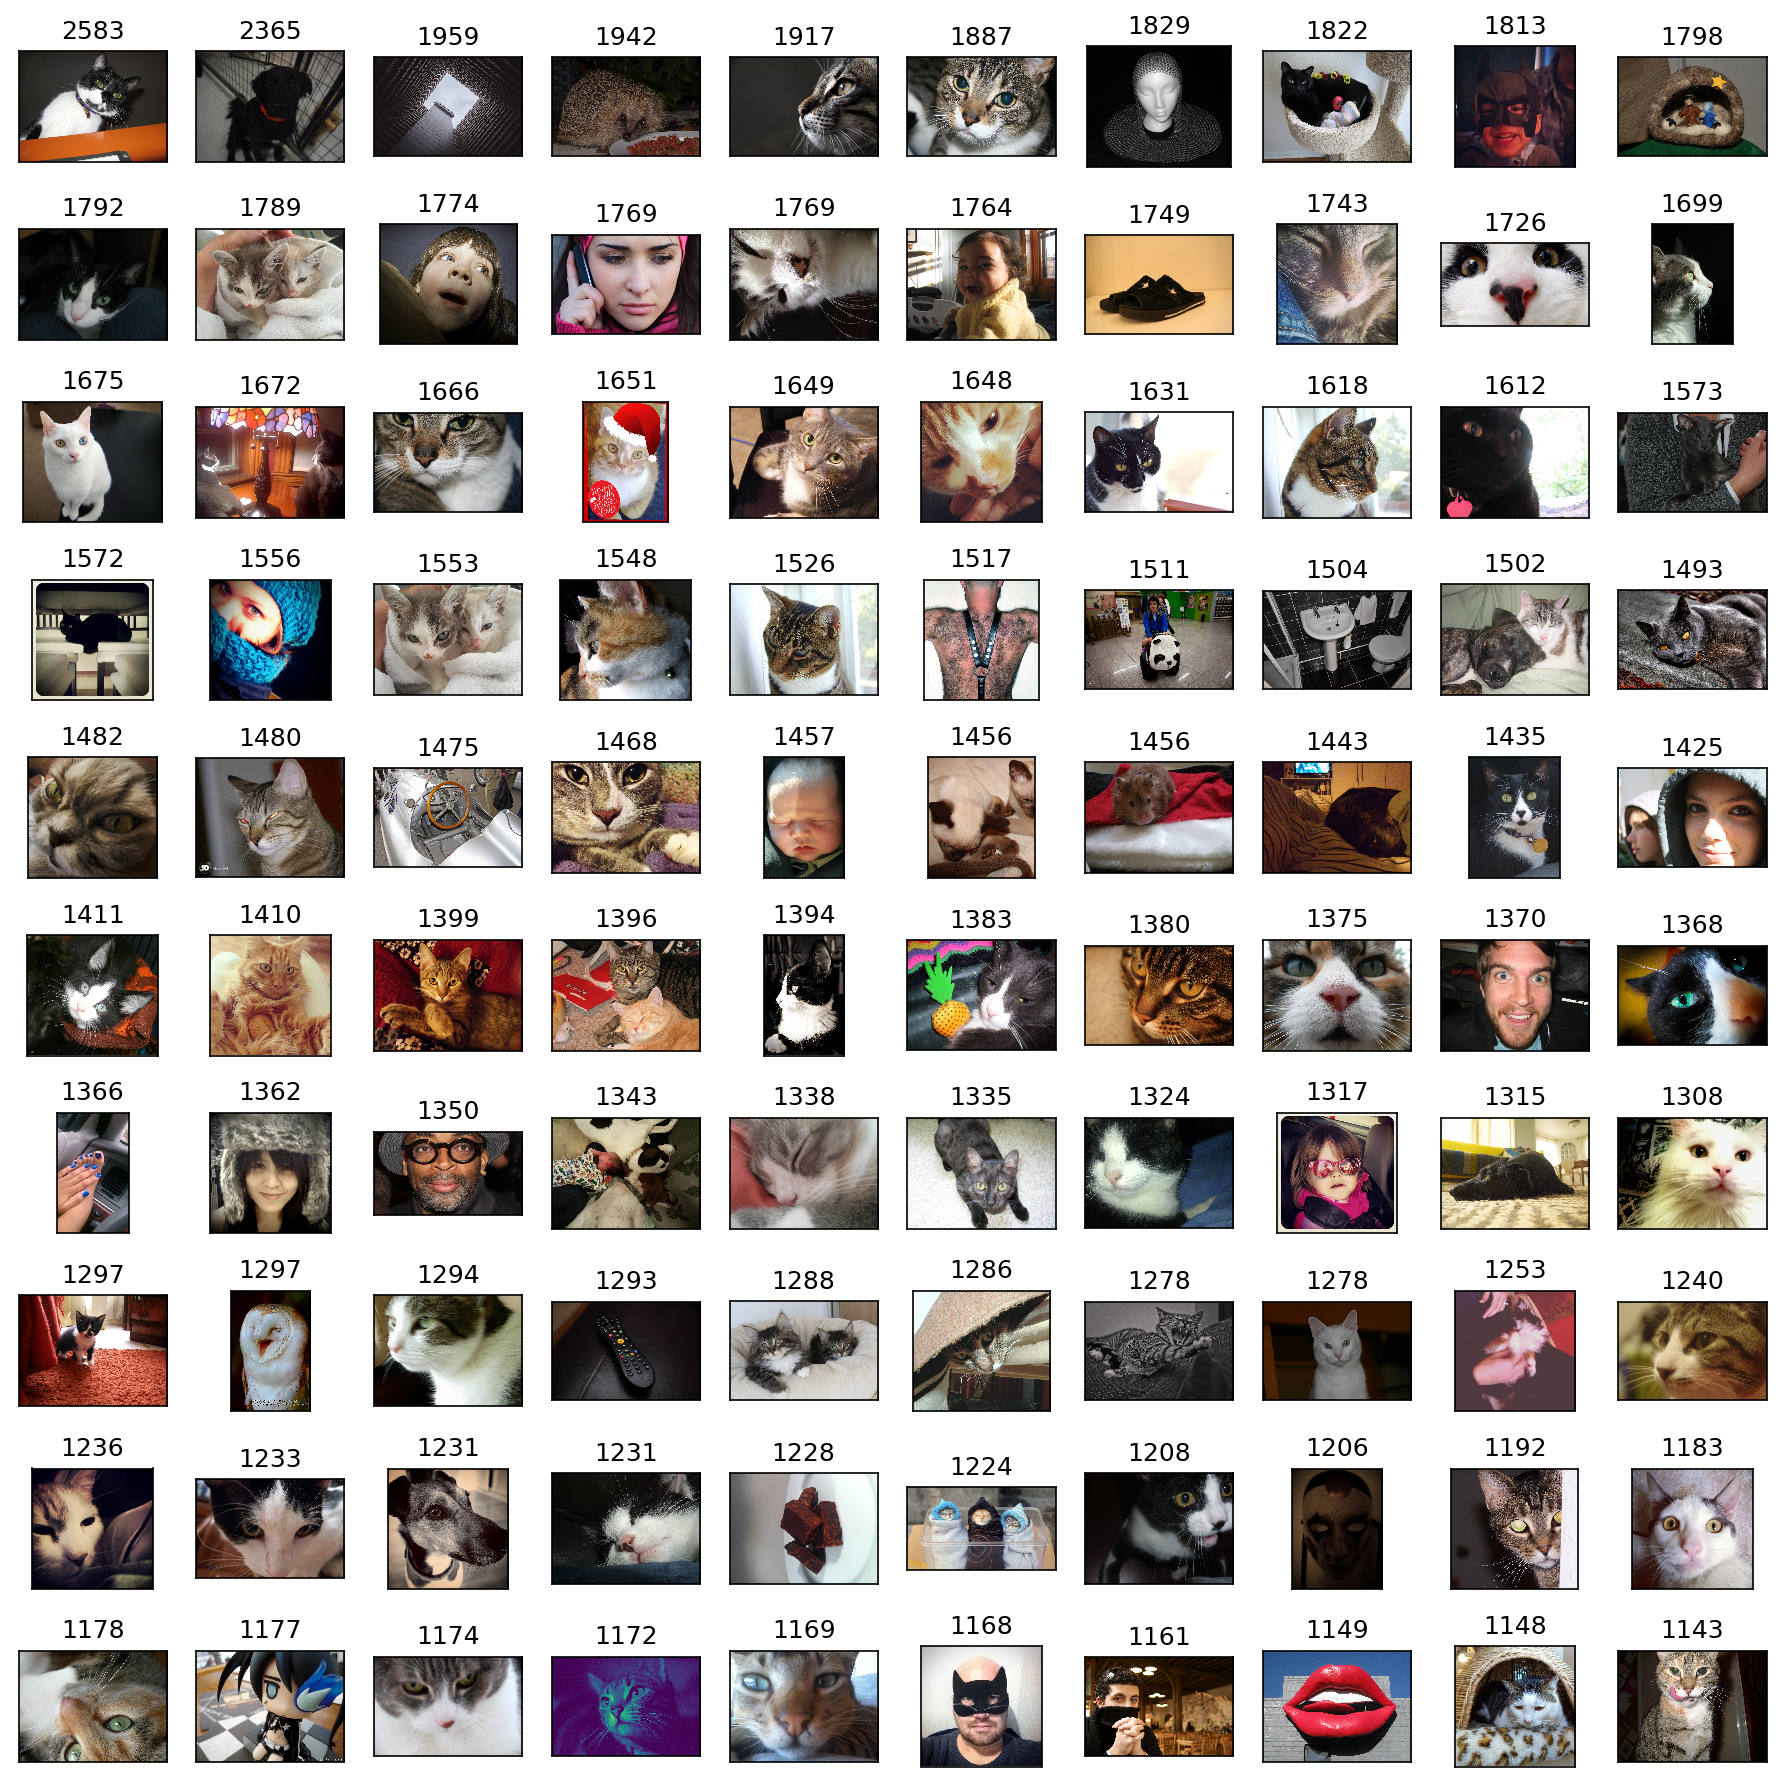

In [10]:
fig, axarr = plt.subplots(10, 10, figsize=(12,12), dpi=150)
for ix, ax in enumerate(axarr.flat):
    img_id = top.index[ix]
    ax.imshow(images[img_id])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(top.iloc[ix].reads)
plt.tight_layout()